# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.
- Reading and Understanding the Data
- Training the data
- Residual analysis (here we check all linear regression assumption like normally distribution)
- Predicting and Evalaution on the Test data set

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data 
advertising = pd.read_csv(r'Advertising/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#let's check the shape of the dataset
advertising.shape

(200, 4)

In [5]:
#let's check the some more information of the dataset like null values , datatypes etc
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#let's check the null values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

from above we can see there is no null values

In [7]:
#let's check the statistical view of the data
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


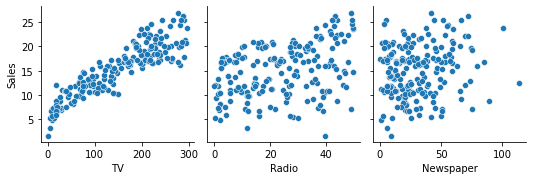

In [8]:
#visualize data
#Tip-1 : wherever we do the any sort of regression better to see the pairplot
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

`from above we can se Sales and Tv have good linear relationship than Radio and last one is Newspaper `

<AxesSubplot:xlabel='TV', ylabel='Sales'>

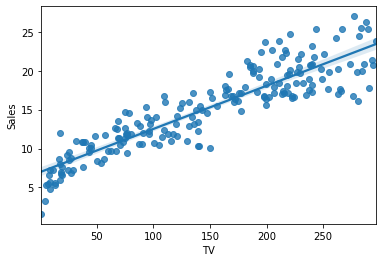

In [9]:
#visulaize the plot between Sales and Tv
sns.regplot(x='TV',y='Sales',data=advertising)

`from above regplot we can see there is very good fit line present i.e mostly data are hugging or around the line`

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

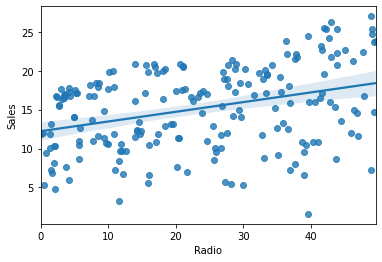

In [10]:
#similarly let's check for Radio too
sns.regplot(x='Radio',y='Sales',data=advertising)

`there is linear relationship b/w radio and Sales(not smooth) but not good as Tv because here if see data is bit scatterd towards the y axis`

In [11]:
#let's check numerical correlation 
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


`from above correaltion matrix we can see TV have max positive correlationship around 0.901 whith sales followed by Radio and Newspaper`

<AxesSubplot:>

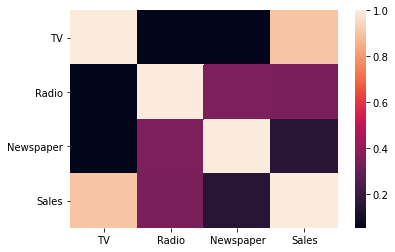

In [12]:
#let's see the heatmap
sns.heatmap(advertising.corr())

<AxesSubplot:>

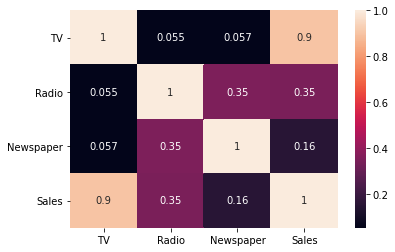

In [13]:
#let's add annotation to see the numerical vvalues of correlation too
sns.heatmap(advertising.corr(),annot=True)

### Building a Linear Model


---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

#### Steps:
- create X and y
- Create Train and Test set (70-30 or 80-20)
- Train your model on training dataset (Learning the coefficent like TV )
- Test and Evaluate the model

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [14]:
import statsmodels 
import statsmodels.api as sm
import sklearn

In [15]:
#create X and y variable
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [19]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [20]:
X_test.shape

(60,)

In [21]:
y_test.shape

(60,)

#### Building a Linear Model Using StatsModel

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

#### Steps :
- add constant to get intercent 
- Fit the regression line using OLS

In [22]:
#Add a constant to get intercept
X_train_sm = sm.add_constant(X_train)

In [23]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
# y = c + m1.X1
# y = c.Const + m1.TV

In [25]:
#Fit  the regression line using OLS(Ordinary Least Squares) Or we can say fitting the model
lr = sm.OLS(y_train,X_train_sm).fit()

In [26]:
#let's see the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
# Sales = 6.948 + 0.05 .TV

#another code for above 

- X_train_sm = sm.add_constant(X_train)

here in below code it just create instae

- lr = sm.OLS(y_train, X_train_sm)

using fit function will fit the model and learn the instance

- lr_model=lr.fit()

In [28]:
#let's see the summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.52e-52
Time:                        13:55:09   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`From above summary we can see R-squared and adjust R_squared etc.
- As we R-squared is 0.81 that means 81 % variance in Sales is explained by Tv
- Tips: mostly in sumary we look below things
  - Coef and P-Value 
  - R-squared very high(is good)
  - P(F-satatistics) is low (less than 0.05) ===> that tells Fit is not by chance 

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

#### we have to visualised the predicted regression line on the scatter plot of the training data which is one of the things you should do as a part of model evaluation.

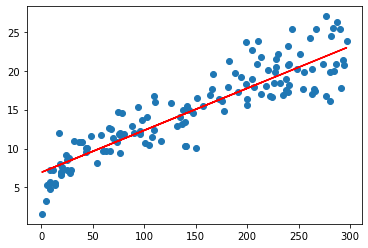

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
#plt.plot(X_train, y_train_pred, 'r')
plt.show()

### Step 3 Residual Analysis

In [30]:
#error = f(y_train,y_train_pred)
#as we have laredy predicted model lr which know the coefficent values alredy
y_train_pred = lr.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [31]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

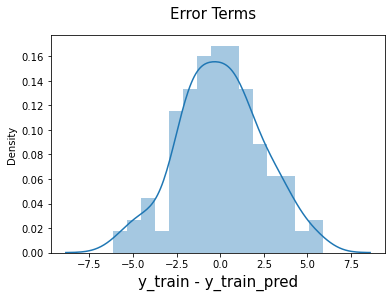

In [32]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Tip for interview : for the assumption there are 2 thing which we can focous like one is above checking the normal distribution and another is looking for the pattern ..it is not expected to have any kind of pattern 

## looking for the pattern 
- we will plot the scatter plot b/w x_train and residual
- data should be scatterd around 0.like no clusters in top etc

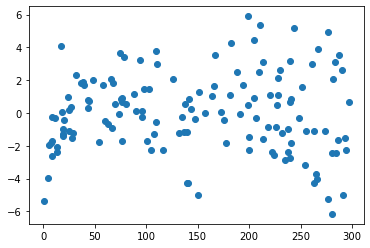

In [33]:
plt.scatter(X_train,res)

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

- make prediction on the testset( y_test_pred)
- Evaluation of the model by calculating R-sqaured and compare that with r_squared of trainset

In [35]:
#adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [36]:
#prediction on y test
y_test_pred = lr.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

## Evaluation of the model


In [37]:
from sklearn.metrics import mean_squared_error ,r2_score
r_squared = r2_score(y_test,y_test_pred)


In [38]:
r_squared

0.7921031601245658

In [39]:
#r2 on train
r_trainSquared  = r2_score(y_train,y_train_pred)

In [40]:
r_trainSquared

0.8157933136480389

` differnece inside 5 is good for r_sqaured is good`

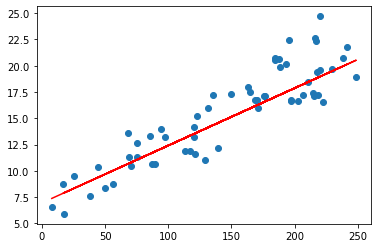

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [44]:
# splitting the dataset 
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
#steps in Sklearn building
#1. create an object of linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [48]:
#fit the model
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

`for the above error we need to do reshaping`

In [51]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [52]:
#now fit the model again
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
#to see the parameters values
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [56]:
#make the prediction first for train no need to do it just need to compare , but we can skip ad can do only for test
y_train_pred = lm.predict(X_train)

In [57]:
y_train_pred

array([18.58874687, 15.21236477, 18.13056255, 14.74327129, 14.27417782,
       11.32325258, 20.02875475, 11.76507318,  8.00687081, 19.26511421,
       14.37781475,  8.3177816 ,  9.02142181, 16.35782558, 12.93780687,
       20.04511848, 19.60875245, 10.55415747, 18.86147564, 19.73966226,
        8.24687212, 10.64688525, 23.11604436, 14.65599809, 16.49964454,
       18.97602172, 11.11597872, 20.79239529, 17.37237658, 22.63604174,
       12.42507679, 19.38511486, 13.80508434, 11.02325094, 10.08506399,
       21.27785249, 21.28876164, 19.89784494, 19.34147826, 17.84692463,
       19.40147859, 22.80513357, 22.05240218, 17.84692463, 20.00148187,
       10.95234146, 22.45604075, 14.9832726 , 19.16693185, 17.79783345,
       22.04149303,  7.66868714,  7.58686851, 22.23240317,  9.10324044,
       21.43603517,  8.44869141, 22.25967604, 11.21416108, 15.85600465,
       18.59420145, 22.96331626,  7.96868878, 11.06688755, 16.04691479,
        9.38687836, 12.93780687,  7.42323125, 21.50694465, 18.23

In [58]:
#let's do the prediction for our test set which is our goal too
y_test_pred = lm.predict(X_test)

In [59]:
y_test_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [60]:
#evaluation on train and test set
r2_squared_test = r2_score(y_test,y_test_pred)

In [61]:
r2_squared_test

0.7921031601245662

In [62]:
#for training set
r2_squared_train = r2_score(y_train,y_train_pred)

In [63]:
r2_squared_train

0.8157933136480389